<a href="https://colab.research.google.com/github/shahd1995913/Tahalf-Mechine-Learning-DS3/blob/main/DecisionTreeClassification/ML1_S7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML1-S7 (Assignment)
----


## Problem 1:  Decision Tree Classification
---
Build a classification model based on Decision trees to classify the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) , split the data to 70% training set and 30% testing set and report the training and testing accuracy.

In [1]:
### Start Your Code Here ####
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import train_test_split function
from sklearn.model_selection import train_test_split 
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import math
import operator
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
### End Your Code Here ####

In [2]:
#Loading the Data
iris= load_iris()
print("Features: ", iris.feature_names)
print("Labels: ", iris.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [3]:
iris.data.shape

(150, 4)

In [4]:
print(iris.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# Split X and Y
#======================
X= iris.data
Y= iris.target

# split the data to 70% training set and 30% testing set
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.30,random_state=32)  
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 105 samples 
test set size: 45 samples


In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

In [8]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [9]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# report the training and testing accuracy.
print("Test Accuracy:",clf.score(X_test,y_test))
print("Train Accuracy:",clf.score(X_train,y_train))


Accuracy: 0.9777777777777777
Test Accuracy: 0.9777777777777777
Train Accuracy: 1.0


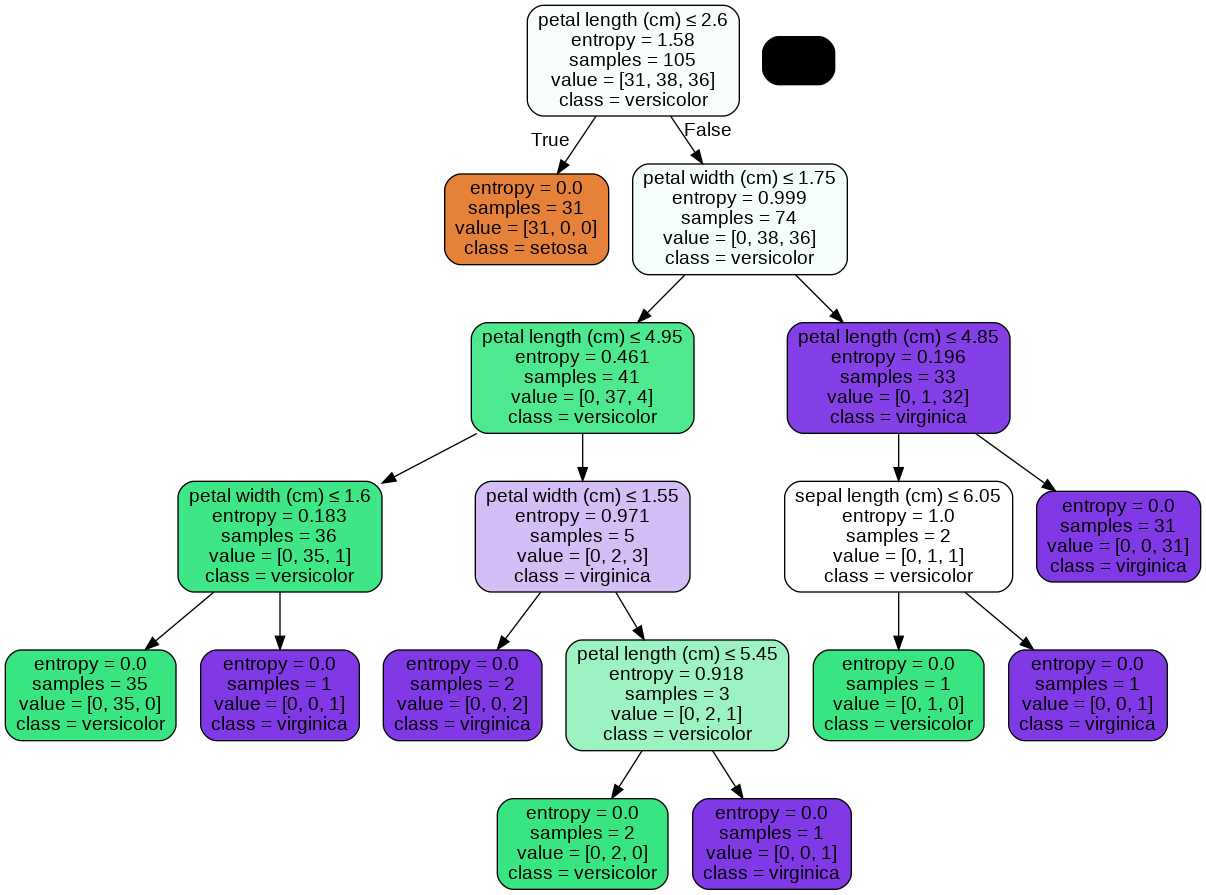

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True,feature_names= iris.feature_names ,  class_names= ['setosa' , 'versicolor' , 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())


In [13]:
# Model Accuracy: how often is the classifier correct?
y_pred = clf.predict(X_test)
print("Accuracy on Test -->:",metrics.accuracy_score(y_test, y_pred))
# print(custom_model_score)
print(classification_report(y_test,y_pred))

print("-----------------------------------------------------------")
print("-----------------------------------------------------------")

x_pred = clf.predict(X_train)
print("Accuracy on Train -->  :",metrics.accuracy_score(y_train, x_pred))
# print(custom_model_score)
print(classification_report(y_train,x_pred))

Accuracy on Test -->: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

-----------------------------------------------------------
-----------------------------------------------------------
Accuracy on Train -->  : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

